## Exercise 3

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: list
    final:str

In [6]:
def name_node(state: AgentState) -> AgentState:
    """" This is the first node to personalize the name field with a greeting """

    state['final'] = f"{state['name']}, welcome to the system! "

    return state

def age_node(state: AgentState) -> AgentState:
    """ This is the second node to describe user's age """

    state['final'] = state['final'] + f"You are {state['age']} years old! "

    return state

def skills_node(state: AgentState) -> AgentState:
    """ This is the third node to list user's skills """

    state['final'] = state['final'] + f"You have skills in {', '.join(state['skills'])}"

    return state

In [7]:
graph = StateGraph(AgentState)

graph.add_node("name_node", name_node)
graph.add_node("age_node", age_node)
graph.add_node("skills_node", skills_node)

graph.set_entry_point("name_node")
graph.add_edge("name_node", "age_node")
graph.add_edge("age_node", "skills_node")
graph.set_finish_point("skills_node")

app = graph.compile()

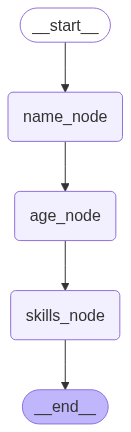

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})
print(result['final'])

Linda, welcome to the system! You are 31 years old! You have skills in Python, Machine Learning, LangGraph
